In [1]:
import hgfp
import torch
import dgl

In [2]:
element_to_idx = {b'BR': 0, b'C': 1, b'C2': 2, b'CA': 3, b'CB': 4, b'CC': 5, b'CJ': 6, b'CL': 7, b'CM': 8, b'CP': 9, b'CR': 10, b'CT': 11, b'CW': 12, b'Cstar': 13, b'F': 14, b'H': 15, b'H1': 16, b'H2': 17, b'H3': 18, b'H4': 19, b'H5': 20, b'HA': 21, b'HC': 22, b'HO': 23, b'HP': 24, b'HX': 25, b'I': 26, b'N': 27, b'N2': 28, b'N3': 29, b'NA': 30, b'NB': 31, b'NC': 32, b'NL': 33, b'Nstar': 34, b'Nu': 35, b'O': 36, b'O2': 37, b'OH': 38, b'OS': 39, b'Ou': 40, b'P': 41, b'S': 42, b'SO': 43, b'Su': 44}

In [3]:
idx_to_element = {v: k.decode("utf-8") for k, v in element_to_idx.items()}

In [4]:
ds = list(hgfp.data.parm_at_Frosst.df.batched(num=100, batch_size=16))

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [5]:
print(len(ds))

6


In [6]:
ds_tr, ds_vl, ds_te = hgfp.data.utils.split(ds, 1, 1)

In [7]:
class Classifier(torch.nn.Module):
    def __init__(self, in_dim=128, out_dim=256, n_classes=45):
        super(Classifier, self).__init__()
        self.d = torch.nn.Linear(in_dim, out_dim)
        self.c = torch.nn.Linear(out_dim, n_classes)
        
    def forward(self, g):
        h_v = g.nodes['atom'].data['h']
        y_hat = self.c(
                torch.nn.functional.sigmoid(
                    self.d(
                        h_v)))
        
        return y_hat
        

In [10]:
net = hgfp.models.gcn_with_combine_readout.Net([128, 'tanh', 128, 'tanh', 128])
# net = Net()
# net = BaseLine()
classifier = Classifier()

In [11]:
print(net.exes)

['d0', 'a1', 'd2', 'a3', 'd4']


In [12]:
opt = torch.optim.Adam(list(net.parameters()) + list(classifier.parameters()), 1e-3)

In [13]:
loss_fn = torch.nn.CrossEntropyLoss()

In [14]:
for _ in range(500):
    for g, y in ds_tr:
        opt.zero_grad()
        y_hat = classifier(net(g, return_graph=True))
        # y_hat = net(g)
        loss = loss_fn(y_hat, torch.where(torch.gt(y, 0))[1])
        print(loss)
        loss.backward()
        opt.step()

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(3.8376, grad_fn=<NllLossBackward>)
tensor(3.5445, grad_fn=<NllLossBackward>)
tensor(3.2749, grad_fn=<NllLossBackward>)
tensor(3.1234, grad_fn=<NllLossBackward>)
tensor(3.0051, grad_fn=<NllLossBackward>)
tensor(2.9877, grad_fn=<NllLossBackward>)
tensor(2.8716, grad_fn=<NllLossBackward>)
tensor(2.8602, grad_fn=<NllLossBackward>)
tensor(2.8103, grad_fn=<NllLossBackward>)
tensor(2.8969, grad_fn=<NllLossBackward>)
tensor(2.8122, grad_fn=<NllLossBackward>)
tensor(2.8156, grad_fn=<NllLossBackward>)
tensor(2.7654, grad_fn=<NllLossBackward>)
tensor(2.8944, grad_fn=<NllLossBackward>)
tensor(2.8025, grad_fn=<NllLossBackward>)
tensor(2.7925, grad_fn=<NllLossBackward>)
tensor(2.7501, grad_fn=<NllLossBackward>)
tensor(2.8813, grad_fn=<NllLossBackward>)
tensor(2.7896, grad_fn=<NllLossBackward>)
tensor(2.7742, grad_fn=<NllLossBackward>)
tensor(2.7498, grad_fn=<NllLossBackward>)
tensor(2.8654, grad_fn=<NllLossBackward>)
tensor(2.7772, grad_fn=<NllLossBackward>)
tensor(2.7659, grad_fn=<NllLossBac

tensor(2.4976, grad_fn=<NllLossBackward>)
tensor(2.5192, grad_fn=<NllLossBackward>)
tensor(2.4950, grad_fn=<NllLossBackward>)
tensor(2.5856, grad_fn=<NllLossBackward>)
tensor(2.4865, grad_fn=<NllLossBackward>)
tensor(2.5097, grad_fn=<NllLossBackward>)
tensor(2.4738, grad_fn=<NllLossBackward>)
tensor(2.5818, grad_fn=<NllLossBackward>)
tensor(2.4710, grad_fn=<NllLossBackward>)
tensor(2.4961, grad_fn=<NllLossBackward>)
tensor(2.4755, grad_fn=<NllLossBackward>)
tensor(2.5779, grad_fn=<NllLossBackward>)
tensor(2.4607, grad_fn=<NllLossBackward>)
tensor(2.4976, grad_fn=<NllLossBackward>)
tensor(2.4681, grad_fn=<NllLossBackward>)
tensor(2.5811, grad_fn=<NllLossBackward>)
tensor(2.4498, grad_fn=<NllLossBackward>)
tensor(2.4950, grad_fn=<NllLossBackward>)
tensor(2.4714, grad_fn=<NllLossBackward>)
tensor(2.6029, grad_fn=<NllLossBackward>)
tensor(2.4407, grad_fn=<NllLossBackward>)
tensor(2.5169, grad_fn=<NllLossBackward>)
tensor(2.5012, grad_fn=<NllLossBackward>)
tensor(2.5896, grad_fn=<NllLossBac

tensor(2.2180, grad_fn=<NllLossBackward>)
tensor(2.1584, grad_fn=<NllLossBackward>)
tensor(2.3104, grad_fn=<NllLossBackward>)
tensor(2.1034, grad_fn=<NllLossBackward>)
tensor(2.2151, grad_fn=<NllLossBackward>)
tensor(2.1515, grad_fn=<NllLossBackward>)
tensor(2.3470, grad_fn=<NllLossBackward>)
tensor(2.0725, grad_fn=<NllLossBackward>)
tensor(2.2320, grad_fn=<NllLossBackward>)
tensor(2.1758, grad_fn=<NllLossBackward>)
tensor(2.3201, grad_fn=<NllLossBackward>)
tensor(2.1032, grad_fn=<NllLossBackward>)
tensor(2.2341, grad_fn=<NllLossBackward>)
tensor(2.1107, grad_fn=<NllLossBackward>)
tensor(2.3415, grad_fn=<NllLossBackward>)
tensor(2.1052, grad_fn=<NllLossBackward>)
tensor(2.1659, grad_fn=<NllLossBackward>)
tensor(2.1604, grad_fn=<NllLossBackward>)
tensor(2.3021, grad_fn=<NllLossBackward>)
tensor(2.0375, grad_fn=<NllLossBackward>)
tensor(2.2288, grad_fn=<NllLossBackward>)
tensor(2.1212, grad_fn=<NllLossBackward>)
tensor(2.2942, grad_fn=<NllLossBackward>)
tensor(2.0983, grad_fn=<NllLossBac

tensor(2.0069, grad_fn=<NllLossBackward>)
tensor(1.6229, grad_fn=<NllLossBackward>)
tensor(1.9180, grad_fn=<NllLossBackward>)
tensor(1.7445, grad_fn=<NllLossBackward>)
tensor(2.0089, grad_fn=<NllLossBackward>)
tensor(1.6914, grad_fn=<NllLossBackward>)
tensor(1.8502, grad_fn=<NllLossBackward>)
tensor(1.7442, grad_fn=<NllLossBackward>)
tensor(2.0070, grad_fn=<NllLossBackward>)
tensor(1.6151, grad_fn=<NllLossBackward>)
tensor(1.8542, grad_fn=<NllLossBackward>)
tensor(1.7223, grad_fn=<NllLossBackward>)
tensor(1.9453, grad_fn=<NllLossBackward>)
tensor(1.6226, grad_fn=<NllLossBackward>)
tensor(1.8257, grad_fn=<NllLossBackward>)
tensor(1.6459, grad_fn=<NllLossBackward>)
tensor(1.9630, grad_fn=<NllLossBackward>)
tensor(1.5886, grad_fn=<NllLossBackward>)
tensor(1.7805, grad_fn=<NllLossBackward>)
tensor(1.6680, grad_fn=<NllLossBackward>)
tensor(1.9715, grad_fn=<NllLossBackward>)
tensor(1.5182, grad_fn=<NllLossBackward>)
tensor(1.7935, grad_fn=<NllLossBackward>)
tensor(1.6639, grad_fn=<NllLossBac

tensor(1.3380, grad_fn=<NllLossBackward>)
tensor(1.6154, grad_fn=<NllLossBackward>)
tensor(1.2553, grad_fn=<NllLossBackward>)
tensor(1.4655, grad_fn=<NllLossBackward>)
tensor(1.3406, grad_fn=<NllLossBackward>)
tensor(1.6184, grad_fn=<NllLossBackward>)
tensor(1.2315, grad_fn=<NllLossBackward>)
tensor(1.4599, grad_fn=<NllLossBackward>)
tensor(1.2884, grad_fn=<NllLossBackward>)
tensor(1.6235, grad_fn=<NllLossBackward>)
tensor(1.2317, grad_fn=<NllLossBackward>)
tensor(1.3884, grad_fn=<NllLossBackward>)
tensor(1.3078, grad_fn=<NllLossBackward>)
tensor(1.6230, grad_fn=<NllLossBackward>)
tensor(1.1693, grad_fn=<NllLossBackward>)
tensor(1.3891, grad_fn=<NllLossBackward>)
tensor(1.2968, grad_fn=<NllLossBackward>)
tensor(1.5649, grad_fn=<NllLossBackward>)
tensor(1.1585, grad_fn=<NllLossBackward>)
tensor(1.4102, grad_fn=<NllLossBackward>)
tensor(1.2786, grad_fn=<NllLossBackward>)
tensor(1.5692, grad_fn=<NllLossBackward>)
tensor(1.1397, grad_fn=<NllLossBackward>)
tensor(1.3892, grad_fn=<NllLossBac

tensor(1.2640, grad_fn=<NllLossBackward>)
tensor(0.8878, grad_fn=<NllLossBackward>)
tensor(1.1206, grad_fn=<NllLossBackward>)
tensor(0.9789, grad_fn=<NllLossBackward>)
tensor(1.2816, grad_fn=<NllLossBackward>)
tensor(0.8815, grad_fn=<NllLossBackward>)
tensor(1.0927, grad_fn=<NllLossBackward>)
tensor(0.9974, grad_fn=<NllLossBackward>)
tensor(1.2710, grad_fn=<NllLossBackward>)
tensor(0.8818, grad_fn=<NllLossBackward>)
tensor(1.0900, grad_fn=<NllLossBackward>)
tensor(0.9602, grad_fn=<NllLossBackward>)
tensor(1.2564, grad_fn=<NllLossBackward>)
tensor(0.8504, grad_fn=<NllLossBackward>)
tensor(1.0756, grad_fn=<NllLossBackward>)
tensor(1.0152, grad_fn=<NllLossBackward>)
tensor(1.2243, grad_fn=<NllLossBackward>)
tensor(0.8818, grad_fn=<NllLossBackward>)
tensor(1.1357, grad_fn=<NllLossBackward>)
tensor(0.9472, grad_fn=<NllLossBackward>)
tensor(1.2678, grad_fn=<NllLossBackward>)
tensor(0.9013, grad_fn=<NllLossBackward>)
tensor(1.0530, grad_fn=<NllLossBackward>)
tensor(0.9895, grad_fn=<NllLossBac

tensor(1.0637, grad_fn=<NllLossBackward>)
tensor(0.7424, grad_fn=<NllLossBackward>)
tensor(0.9692, grad_fn=<NllLossBackward>)
tensor(0.8175, grad_fn=<NllLossBackward>)
tensor(1.0774, grad_fn=<NllLossBackward>)
tensor(0.7265, grad_fn=<NllLossBackward>)
tensor(0.8889, grad_fn=<NllLossBackward>)
tensor(0.7833, grad_fn=<NllLossBackward>)
tensor(1.0416, grad_fn=<NllLossBackward>)
tensor(0.7050, grad_fn=<NllLossBackward>)
tensor(0.8705, grad_fn=<NllLossBackward>)
tensor(0.8006, grad_fn=<NllLossBackward>)
tensor(1.0421, grad_fn=<NllLossBackward>)
tensor(0.6581, grad_fn=<NllLossBackward>)
tensor(0.8809, grad_fn=<NllLossBackward>)
tensor(0.8069, grad_fn=<NllLossBackward>)
tensor(1.0060, grad_fn=<NllLossBackward>)
tensor(0.6759, grad_fn=<NllLossBackward>)
tensor(0.8736, grad_fn=<NllLossBackward>)
tensor(0.7579, grad_fn=<NllLossBackward>)
tensor(0.9985, grad_fn=<NllLossBackward>)
tensor(0.6828, grad_fn=<NllLossBackward>)
tensor(0.8692, grad_fn=<NllLossBackward>)
tensor(0.7506, grad_fn=<NllLossBac

tensor(0.6655, grad_fn=<NllLossBackward>)
tensor(0.5849, grad_fn=<NllLossBackward>)
tensor(0.7993, grad_fn=<NllLossBackward>)
tensor(0.4884, grad_fn=<NllLossBackward>)
tensor(0.6469, grad_fn=<NllLossBackward>)
tensor(0.6124, grad_fn=<NllLossBackward>)
tensor(0.7643, grad_fn=<NllLossBackward>)
tensor(0.5073, grad_fn=<NllLossBackward>)
tensor(0.6830, grad_fn=<NllLossBackward>)
tensor(0.5826, grad_fn=<NllLossBackward>)
tensor(0.7968, grad_fn=<NllLossBackward>)
tensor(0.5017, grad_fn=<NllLossBackward>)
tensor(0.6506, grad_fn=<NllLossBackward>)
tensor(0.5986, grad_fn=<NllLossBackward>)
tensor(0.7898, grad_fn=<NllLossBackward>)
tensor(0.5020, grad_fn=<NllLossBackward>)
tensor(0.7013, grad_fn=<NllLossBackward>)
tensor(0.5875, grad_fn=<NllLossBackward>)
tensor(0.8230, grad_fn=<NllLossBackward>)
tensor(0.5355, grad_fn=<NllLossBackward>)
tensor(0.6695, grad_fn=<NllLossBackward>)
tensor(0.6547, grad_fn=<NllLossBackward>)
tensor(0.8312, grad_fn=<NllLossBackward>)
tensor(0.5111, grad_fn=<NllLossBac

tensor(0.7167, grad_fn=<NllLossBackward>)
tensor(0.4650, grad_fn=<NllLossBackward>)
tensor(0.5498, grad_fn=<NllLossBackward>)
tensor(0.5373, grad_fn=<NllLossBackward>)
tensor(0.7543, grad_fn=<NllLossBackward>)
tensor(0.4062, grad_fn=<NllLossBackward>)
tensor(0.6553, grad_fn=<NllLossBackward>)
tensor(0.5485, grad_fn=<NllLossBackward>)
tensor(0.6670, grad_fn=<NllLossBackward>)
tensor(0.5289, grad_fn=<NllLossBackward>)
tensor(0.5895, grad_fn=<NllLossBackward>)
tensor(0.5147, grad_fn=<NllLossBackward>)
tensor(0.8200, grad_fn=<NllLossBackward>)
tensor(0.4434, grad_fn=<NllLossBackward>)
tensor(0.6509, grad_fn=<NllLossBackward>)
tensor(0.6121, grad_fn=<NllLossBackward>)
tensor(0.7256, grad_fn=<NllLossBackward>)
tensor(0.5583, grad_fn=<NllLossBackward>)
tensor(0.6014, grad_fn=<NllLossBackward>)
tensor(0.5561, grad_fn=<NllLossBackward>)
tensor(0.9042, grad_fn=<NllLossBackward>)
tensor(0.4605, grad_fn=<NllLossBackward>)
tensor(0.7599, grad_fn=<NllLossBackward>)
tensor(0.6640, grad_fn=<NllLossBac

tensor(0.5771, grad_fn=<NllLossBackward>)
tensor(0.3484, grad_fn=<NllLossBackward>)
tensor(0.4576, grad_fn=<NllLossBackward>)
tensor(0.4196, grad_fn=<NllLossBackward>)
tensor(0.5876, grad_fn=<NllLossBackward>)
tensor(0.3344, grad_fn=<NllLossBackward>)
tensor(0.5135, grad_fn=<NllLossBackward>)
tensor(0.4223, grad_fn=<NllLossBackward>)
tensor(0.5888, grad_fn=<NllLossBackward>)
tensor(0.4269, grad_fn=<NllLossBackward>)
tensor(0.4551, grad_fn=<NllLossBackward>)
tensor(0.4852, grad_fn=<NllLossBackward>)
tensor(0.6128, grad_fn=<NllLossBackward>)
tensor(0.3354, grad_fn=<NllLossBackward>)
tensor(0.5794, grad_fn=<NllLossBackward>)
tensor(0.4166, grad_fn=<NllLossBackward>)
tensor(0.5872, grad_fn=<NllLossBackward>)
tensor(0.4244, grad_fn=<NllLossBackward>)
tensor(0.4779, grad_fn=<NllLossBackward>)
tensor(0.4508, grad_fn=<NllLossBackward>)
tensor(0.7279, grad_fn=<NllLossBackward>)
tensor(0.3556, grad_fn=<NllLossBackward>)
tensor(0.5764, grad_fn=<NllLossBackward>)
tensor(0.4784, grad_fn=<NllLossBac

tensor(0.3302, grad_fn=<NllLossBackward>)
tensor(0.4897, grad_fn=<NllLossBackward>)
tensor(0.2768, grad_fn=<NllLossBackward>)
tensor(0.3786, grad_fn=<NllLossBackward>)
tensor(0.3305, grad_fn=<NllLossBackward>)
tensor(0.4921, grad_fn=<NllLossBackward>)
tensor(0.2748, grad_fn=<NllLossBackward>)
tensor(0.3840, grad_fn=<NllLossBackward>)
tensor(0.3256, grad_fn=<NllLossBackward>)
tensor(0.4848, grad_fn=<NllLossBackward>)
tensor(0.2787, grad_fn=<NllLossBackward>)
tensor(0.3761, grad_fn=<NllLossBackward>)


In [16]:
net.eval()
from sklearn.metrics import confusion_matrix
for g, y in ds_tr:
    y_hat = torch.argmax(classifier(net(g, return_graph=True)), dim=1)
    y = torch.argmax(y, dim=1)
    

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [17]:
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(y, y_hat, labels=list(range(1, 46))),
    [v for k, v in idx_to_element.items()],
    [v for k, v in idx_to_element.items()])

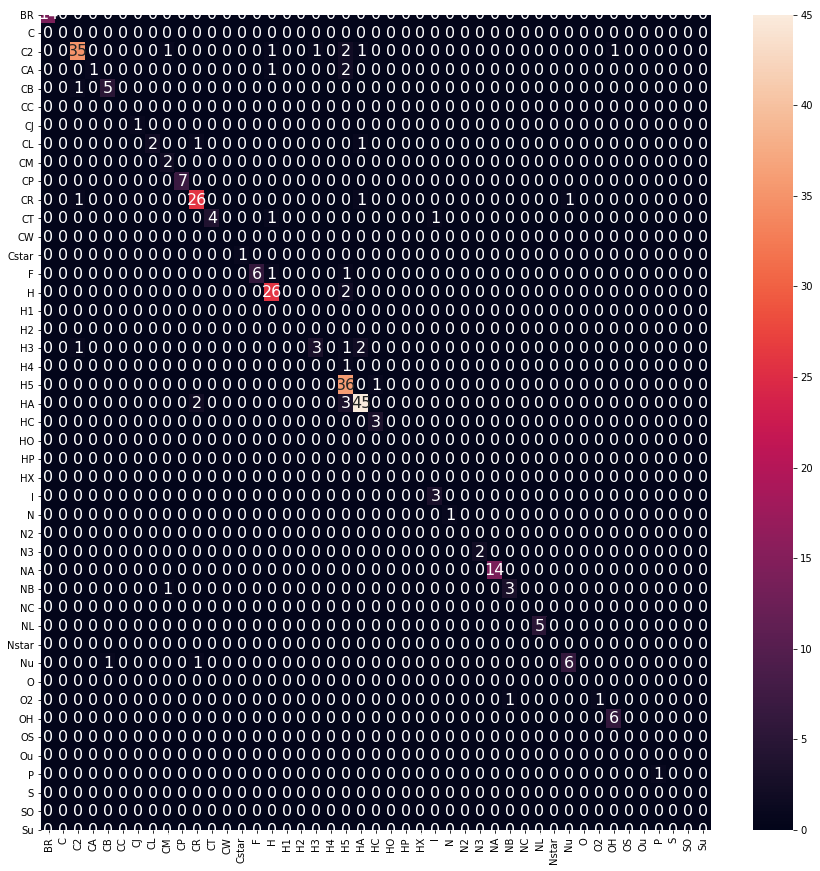

In [19]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()